In [67]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pandas as pd

import torch

In [72]:
if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print(f"Using device: cuda:{device}")
else:
    print("No GPU available")

Using device: cuda:0


In [41]:
img_paths = glob.glob("/work/LitArt/data/images/*")

In [42]:
img_data = pd.read_csv("/work/LitArt/data/filtered_CMU_data_with_images.csv")

In [43]:
img_data.head()

,ID,URI,Title,Author,Publication Date,Genres,Synopsis,URL,isImageAvailable,imageLocation
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",https://www.goodreads.com/book/show/170448.Ani...,True,/work/LitArt/data/images/Animal_Farm-George_Or...
1,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,https://www.goodreads.com/book/show/11989.The_...,True,/work/LitArt/data/images/The_Plague-Albert_Cam...
2,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,https://www.goodreads.com/book/show/130119.An_...,True,/work/LitArt/data/images/An_Enquiry_Concerning...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,https://www.goodreads.com/book/show/77711.A_Fi...,True,/work/LitArt/data/images/A_Fire_Upon_the_Deep-...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge...",https://www.goodreads.com/book/show/355697.All...,True,/work/LitArt/data/images/All_Quiet_on_the_West...


In [44]:
img_data['synopsis_length'] = img_data.Synopsis.apply(lambda x:len(x.split()))

<Axes: ylabel='Frequency'>

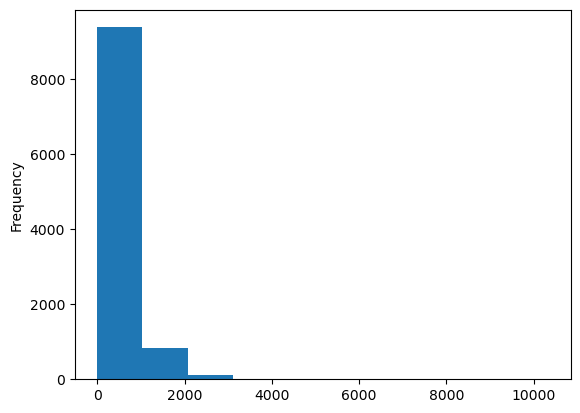

In [45]:
img_data.synopsis_length.plot(kind='hist')

## Data Creation

In [46]:
print(f"{len(img_data[(img_data.synopsis_length<100)&(img_data.synopsis_length>10)])/len(img_data)*100}% summaries have a length under 100 words and more than 10")

16.90956471383071% summaries have a length under 100 words and more than 10


In [47]:
## Trimming dataset to have summaries with length greater than 10 and less than 100

data_subset = img_data[(img_data.synopsis_length<100)&(img_data.synopsis_length>10)]

In [48]:
data_subset.head()

,ID,URI,Title,Author,Publication Date,Genres,Synopsis,URL,isImageAvailable,imageLocation,synopsis_length
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul...",https://www.goodreads.com/book/show/80239.Blad...,True,/work/LitArt/data/images/Blade_Runner_3_Replic...,56
26,17414,/m/04fpm,Icehenge,Kim Stanley Robinson,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Icehenge is part mystery, part psychological ...",https://www.goodreads.com/book/show/41127.Iceh...,True,/work/LitArt/data/images/Icehenge-Kim_Stanley_...,69
97,44524,/m/0c432,Mutiny on the Bounty,James Norman Hall,1932,"{""/m/03g3w"": ""History"", ""/m/05hgj"": ""Novel""}",The novel tells the story through a fictional...,https://www.goodreads.com/book/show/335795.The...,True,/work/LitArt/data/images/Mutiny_on_the_Bounty-...,66
98,44672,/m/0c57q,The Mothman Prophecies,John A. Keel,1975,NaN,The book combines Keel's account of his inves...,https://www.goodreads.com/book/show/567682.The...,True,/work/LitArt/data/images/The_Mothman_Prophecie...,57
143,56575,/m/0fmw0,Castle Rackrent,Maria Edgeworth,NaN,"{""/m/02xlf"": ""Fiction"", ""/m/0hwxm"": ""Historica...",The novel is set prior to the Constitution of...,https://www.goodreads.com/book/show/251290.Cas...,True,/work/LitArt/data/images/Castle_Rackrent-Maria...,80


In [49]:
## copying subset images to train folder
destination_path = "../data/train/"

img_paths = data_subset.imageLocation.tolist()

os.makedirs(destination_path, exist_ok=True)

for img_path in img_paths[4:]:
    try:
        filename = os.path.basename(img_path)
        extension = os.path.splitext(filename)[1]

        new_filename = f"{filename[:-len(extension)]}{extension}"

        new_destination_path = os.path.join(destination_path, new_filename)

        shutil.copy2(img_path, new_destination_path)
    except Exception as e:
        print(f"Error transferring {img_path}: {e}")

Error transferring nan: expected str, bytes or os.PathLike object, not float
Error transferring nan: expected str, bytes or os.PathLike object, not float
Error transferring nan: expected str, bytes or os.PathLike object, not float


In [56]:
metadata = pd.DataFrame({'file_name':data_subset.imageLocation.tolist(),'text':data_subset.Synopsis.tolist()})

In [57]:
metadata.dropna(subset=['file_name'],inplace=True)

In [58]:
metadata.file_name = metadata.file_name.apply(lambda x: os.path.basename(x))

In [59]:
metadata.head(2)

,file_name,text
0,Blade_Runner_3_Replicant_Night-K_W_Jeter.jpg,"Living on Mars, Deckard is acting as a consul..."
1,Icehenge-Kim_Stanley_Robinson.jpg,"Icehenge is part mystery, part psychological ..."


In [60]:
metadata.to_csv("../data/train/metadata.csv",index=False)

## Loading the new dataset

In [61]:
from datasets import  load_dataset

dataset = load_dataset("imagefolder", data_dir = "../data/",split='train')

Generating train split: 1745 examples [00:00, 11721.15 examples/s]


In [73]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 1745
})

In [65]:
export MODEL_NAME="CompVis/stable-diffusion-v1-4"
export INSTANCE_DIR="../data/"
export OUTPUT_DIR="./trained_models/"

In [66]:
%run accelerate launch train_dreambooth.py \
  --mixed_precision="fp16" \
  --pretrained_model_name_or_path=MODEL_NAME  \
  --instance_data_dir=INSTANCE_DIR \
  --output_dir=OUTPUT_DIR \
  --instance_prompt="a <book cover> for a magical fantasy book" \
  --train_text_encoder \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --learning_rate=2e-6 \
  --lr_scheduler="DDIM" \
  --lr_warmup_steps=0 \
  --max_train_steps=400 \
  --gradient_checkpointing \
  --use_8bit_adam \

ValueError: No escaped character